In [247]:
from linares_plot import *
import statsmodels.formula.api as smf


In [248]:
data = pd.read_csv('C:\\Users\\David\\Dropbox\\IDIBAPS\\my code\\Project 1 (master thesis)\\idibaps_psychophysics_rt')

In [249]:
len(data)

8186

In [250]:
df_controls = data.loc[data['type']==0]
df_controls.head()

,Unnamed: 0,r_T,r_NT,delay,type,A_T,A_NT,A_err,r_err,A_R,r_R,RT,subject,session,Int_A_err,Int_r_err
0,0,13.68,NaN,0.0,0.0,314.0,NaN,-1.90,1.81,315.90,11.87,0.0,1,1,NaN,NaN
2,2,10.70,NaN,3.0,0.0,50.0,NaN,6.38,2.97,43.62,7.73,0.0,1,1,NaN,NaN
5,5,13.68,NaN,0.0,0.0,129.0,NaN,-10.73,0.62,139.73,13.06,0.0,1,1,NaN,NaN
6,6,13.68,NaN,3.0,0.0,304.0,NaN,4.01,0.96,299.99,12.72,0.0,1,1,NaN,NaN
7,7,13.68,NaN,3.0,0.0,215.0,NaN,-1.36,-1.49,216.36,15.17,0.0,1,1,NaN,NaN


In [251]:
len(df_controls)

3396

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


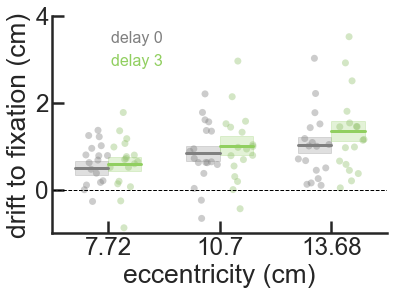

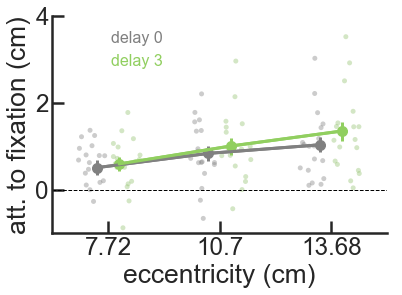

In [8]:
c_d0='grey'
c_d3 = '#91cf60'
df_controls['delay_n']=df_controls['delay'].copy()
df_controls['delay_n']=df_controls['delay_n'].replace([0,3], ['delay 0', 'delay 3'])


#######################
linares_plot(x='r_T', y='r_err', hue='delay_n', order=[7.72, 10.7, 13.68], hue_order=['delay 0','delay 3'],
             alpha=0.4, palette=[c_d0, c_d3], df=df_controls, point_size=7,   CI=0.68,
             by_subj=True, subj_col='subject',
             plot_box=True, fill_box=True, reps=1000, alpha_box=0.25, sep_axis=False)
plt.ylim(-1,4)

plt.xlabel('eccentricity (cm)')
plt.ylabel('drift to fixation (cm)')
plt.plot([-1,3], [0,0], 'k--', linewidth=1);
plt.show()

print('')

#######################
linares_plot(x='r_T', y='r_err', hue='delay_n', order=[7.72, 10.7, 13.68], hue_order=['delay 0','delay 3'],
             alpha=0.4, palette=[c_d0, c_d3], df=df_controls, point_size=5,   CI=0.68,
             by_subj=True, subj_col='subject', LW=3, MS=10,
             plot_box='line', reps=1000, sep_axis=False)
plt.ylim(-1,4)

plt.xlabel('eccentricity (cm)')
plt.ylabel('att. to fixation (cm)')
plt.plot([-1,3], [0,0], 'k--', linewidth=1);
plt.show()


In [9]:
res_m = smf.mixedlm(formula='r_err ~ r_T * delay', data=df_controls, groups=df_controls['subject']).fit()
print(res_m.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r_err     
No. Observations: 3396    Method:             REML      
No. Groups:       18      Scale:              0.9515    
Min. group size:  72      Likelihood:         -4786.2985
Max. group size:  239     Converged:          Yes       
Mean group size:  188.7                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     -0.163    0.198 -0.823 0.410 -0.550  0.225
r_T            0.088    0.010  9.072 0.000  0.069  0.107
delay         -0.078    0.050 -1.554 0.120 -0.177  0.020
r_T:delay      0.013    0.005  2.865 0.004  0.004  0.022
Group Var      0.497    0.177                           



C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


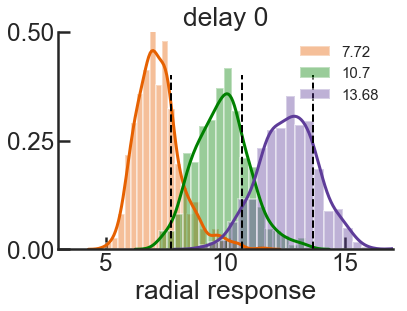

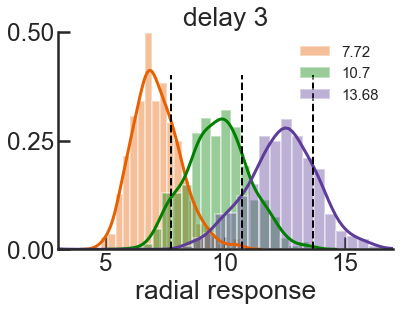

In [10]:

c_r1= '#e66101' 
c_r2='green'
c_r3= '#5e3c99' 

### Distribution A_Err in cw-ccw
sns.distplot(df_controls.loc[ (df_controls['r_T']==7.72) & (df_controls['delay']==0), 'r_R'], color=c_r1, label='7.72')
sns.distplot(df_controls.loc[ (df_controls['r_T']==10.7) & (df_controls['delay']==0), 'r_R'], color=c_r2, label='10.7')
sns.distplot(df_controls.loc[ (df_controls['r_T']==13.68) & (df_controls['delay']==0), 'r_R'], color=c_r3, label='13.68')
plt.title('delay 0')
plt.legend(frameon=False, prop={'size': 15})
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.xlabel('radial response')

plt.plot([7.72, 7.72], [0, 0.4], 'k--', linewidth=2)
plt.plot([10.7, 10.7], [0, 0.4], 'k--', linewidth=2)
plt.plot([13.68, 13.68], [0, 0.4], 'k--', linewidth=2)
plt.xlim(3,17)
plt.ylim(0, 0.5)
plt.yticks([0,0.25,0.5])
plt.gca().tick_params(direction='in')
plt.show()


### Distribution A_Err in cw-ccw
sns.distplot(df_controls.loc[ (df_controls['r_T']==7.72) & (df_controls['delay']==3), 'r_R'], color=c_r1, label='7.72')
sns.distplot(df_controls.loc[ (df_controls['r_T']==10.7) & (df_controls['delay']==3), 'r_R'], color=c_r2, label='10.7')
sns.distplot(df_controls.loc[ (df_controls['r_T']==13.68) & (df_controls['delay']==3), 'r_R'], color=c_r3, label='13.68')
plt.title('delay 3')
plt.legend(frameon=False, prop={'size': 15})
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.xlabel('radial response')

plt.plot([7.72, 7.72], [0, 0.4], 'k--', linewidth=2)
plt.plot([10.7, 10.7], [0, 0.4], 'k--', linewidth=2)
plt.plot([13.68, 13.68], [0, 0.4], 'k--', linewidth=2)
plt.xlim(3,17)
plt.ylim(0,0.5)
plt.yticks([0,0.25,0.5])
plt.gca().tick_params(direction='in')
plt.show()


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


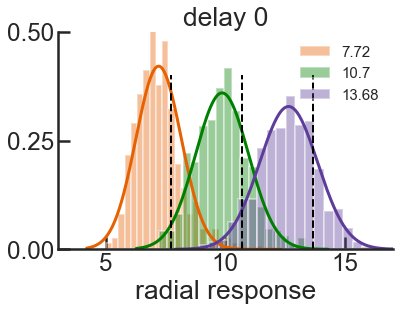

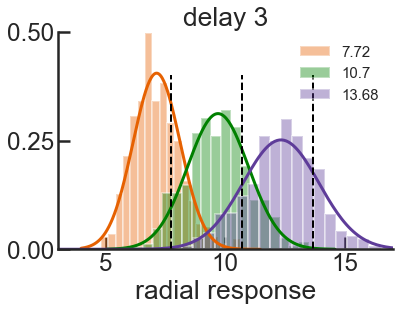

In [11]:
from scipy.stats import norm

c_r1= '#e66101' 
c_r2='green'
c_r3= '#5e3c99' 

### Distribution A_Err in cw-ccw
sns.distplot(df_controls.loc[ (df_controls['r_T']==7.72) & (df_controls['delay']==0), 'r_R'], color=c_r1, label='7.72', fit=norm, kde=False, fit_kws={"color":c_r1})
sns.distplot(df_controls.loc[ (df_controls['r_T']==10.7) & (df_controls['delay']==0), 'r_R'], color=c_r2, label='10.7', fit=norm, kde=False, fit_kws={"color":c_r2})
sns.distplot(df_controls.loc[ (df_controls['r_T']==13.68) & (df_controls['delay']==0), 'r_R'], color=c_r3, label='13.68', fit=norm, kde=False, fit_kws={"color":c_r3})
plt.title('delay 0')
plt.legend(frameon=False, prop={'size': 15})
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.xlabel('radial response')

plt.plot([7.72, 7.72], [0, 0.4], 'k--', linewidth=2)
plt.plot([10.7, 10.7], [0, 0.4], 'k--', linewidth=2)
plt.plot([13.68, 13.68], [0, 0.4], 'k--', linewidth=2)
plt.xlim(3,17)
plt.ylim(0, 0.5)
plt.yticks([0,0.25,0.5])
plt.gca().tick_params(direction='in')
plt.show()


### Distribution A_Err in cw-ccw
sns.distplot(df_controls.loc[ (df_controls['r_T']==7.72) & (df_controls['delay']==3), 'r_R'], color=c_r1, label='7.72', fit=norm, kde=False, fit_kws={"color":c_r1})
sns.distplot(df_controls.loc[ (df_controls['r_T']==10.7) & (df_controls['delay']==3), 'r_R'], color=c_r2, label='10.7', fit=norm, kde=False, fit_kws={"color":c_r2})
sns.distplot(df_controls.loc[ (df_controls['r_T']==13.68) & (df_controls['delay']==3), 'r_R'], color=c_r3, label='13.68', fit=norm, kde=False, fit_kws={"color":c_r3})
plt.title('delay 3')
plt.legend(frameon=False, prop={'size': 15})
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.xlabel('radial response')

plt.plot([7.72, 7.72], [0, 0.4], 'k--', linewidth=2)
plt.plot([10.7, 10.7], [0, 0.4], 'k--', linewidth=2)
plt.plot([13.68, 13.68], [0, 0.4], 'k--', linewidth=2)
plt.xlim(3,17)
plt.ylim(0,0.5)
plt.yticks([0,0.25,0.5])
plt.gca().tick_params(direction='in')
plt.show()


### Serial biases radial dimension

In [246]:
data.head(10)
len(data)

8186

In [252]:
##columna con previous trial, 2 back and 3 back
serial_b = []
for subject in data.subject.unique():
    df_subj = data.loc[data['subject']==subject]
    for session in df_subj.session.unique():
        df_sess = df_subj.loc[df_subj['session']==session]
        for n_back in range(1,13):
            back_n = list(df_sess['r_T'][:-n_back].values)
            ###[back_n.insert(0,  0) for i in range(n_back)]
            [back_n.insert(0,  0) for i in range(n_back)]
            name_col = 'rT_' + str(n_back)
            df_sess[name_col]=back_n
        ####
        serial_b.append(df_sess)
            
#
serial_b=pd.concat(serial_b)
# serial_b=serial_b.loc[(serial_b['rT_1']!='None') & (serial_b['rT_2']!='None') & (serial_b['rT_3']!='None')
#                       & (serial_b['rT_4']!='None')  & (serial_b['rT_5']!='None')]

serial_b = serial_b.astype({"rT_1": float, "rT_2": float,"rT_3": float,"rT_4": float,"rT_5": float,
                           "rT_6": float,"rT_7": float, "rT_8": float, "rT_9": float,"rT_10": float, 
                            "rT_11": float, "rT_12": float})
    

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [253]:
df_inter = serial_b.loc[(serial_b['r_T']==10.7) & (serial_b['type']==0)]
len(df_inter)

1134

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


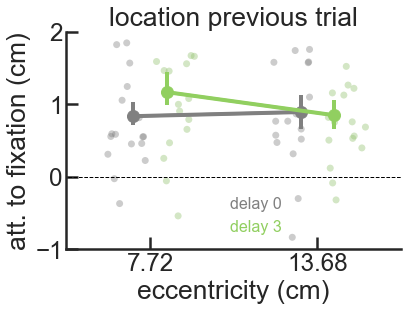

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


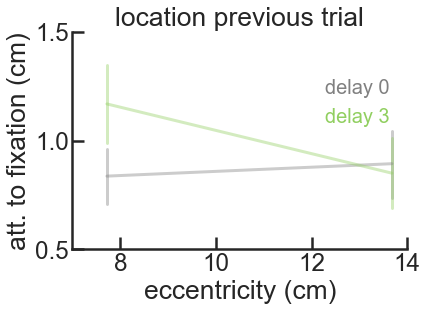

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r_err     
No. Observations: 868     Method:             REML      
No. Groups:       18      Scale:              0.8917    
Min. group size:  12      Likelihood:         -1221.2861
Max. group size:  64      Converged:          Yes       
Mean group size:  48.2                                  
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      0.705    0.241  2.925 0.003  0.233  1.178
rT_1           0.016    0.015  1.020 0.308 -0.014  0.046
delay          0.197    0.081  2.432 0.015  0.038  0.356
rT_1:delay    -0.014    0.007 -1.970 0.049 -0.029 -0.000
Group Var      0.539    0.204                           



In [254]:
### Efecto del previous trial en el attraction to fixation cuando está en un radio interno o externo
##############################################
##############################################
c_d0='grey'
c_d3 = '#91cf60'

df_inter = serial_b.loc[(serial_b['r_T']==10.7) & (serial_b['type']==0)]
df_inter['delay_n']=df_inter['delay'].copy()
df_inter['delay_n']=df_inter['delay_n'].replace([0,3], ['delay 0', 'delay 3'])

trials_back='rT_1'

linares_plot(x=trials_back, y='r_err', hue='delay_n', order=[7.72, 13.68], hue_order=['delay 0', 'delay 3'],
             alpha=0.4, palette=[c_d0, c_d3], df=df_inter, point_size=7,   CI=0.68,
             by_subj=True, subj_col='subject',
             plot_box='line', fill_box=True, reps=100, alpha_box=0.25, sep_axis=False)
plt.ylim(-1,2)
plt.xlim(-0.5, 1.5)
plt.xlabel('eccentricity (cm)')
plt.ylabel('att. to fixation (cm)')
plt.plot([-1,2], [0,0], 'k--', linewidth=1);
plt.title('location previous trial')
plt.show()


##############################################
##############################################

sns.lineplot(x=trials_back, y='r_err', hue='delay_n', hue_order=['delay 0', 'delay 3'],
             alpha=0.4, palette=[c_d0, c_d3], data=df_inter.loc[(df_inter[trials_back]==7.72) | (df_inter[trials_back]==13.68)],
             ci=95, err_style="bars" )
plt.ylim(0.5, 1.5)
plt.yticks([0.5, 1, 1.5])
plt.xlim(7, 14)
plt.xlabel('eccentricity (cm)')
plt.ylabel('att. to fixation (cm)')
plt.plot([7,14], [0,0], 'k--', linewidth=1);
plt.title('location previous trial')

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction

hue_order=['', 'delay 0', 'delay 3']
palette=['k', c_d0, c_d3]

l = plt.legend(loc='best', frameon=False, prop={'size': 20})
for i_h, h_idx in enumerate(hue_order):
    l.get_texts()[i_h].set_text(h_idx)
    l.legendHandles[i_h].set_visible(False);
    l.get_texts()[i_h].set_color(palette[i_h]);
    
plt.show()


##############################################
##############################################

formula_= 'r_err~' + trials_back +'*delay'
res_m = smf.mixedlm(formula=formula_, 
                    data=df_inter.loc[(df_inter[trials_back]==7.72) | (df_inter[trials_back]==13.68)], 
                    groups=df_inter.loc[(df_inter[trials_back]==7.72) | (df_inter[trials_back]==13.68), 'subject']).fit()
print(res_m.summary())



#### En cada radio, ese bias incrementa con el número de previous iguales?

In [255]:
frames=[]

for radius in [7.72, 13.68]:
    pre_r3=  df_inter.loc[df_inter['rT_1']==radius]
    number_prev = [] 
    for i in range(len(pre_r3)):
        if pre_r3['rT_2'].iloc[i] == radius :
            if pre_r3['rT_3'].iloc[i] == radius :
                if pre_r3['rT_4'].iloc[i] == radius :
                    if pre_r3['rT_5'].iloc[i] == radius :
                        if pre_r3['rT_6'].iloc[i] == radius :
                            if pre_r3['rT_7'].iloc[i] == radius :
                                if pre_r3['rT_8'].iloc[i] == radius :
                                    if pre_r3['rT_9'].iloc[i] == radius :
                                        if pre_r3['rT_10'].iloc[i] == radius :
                                            if pre_r3['rT_11'].iloc[i] == radius :
                                                if pre_r3['rT_12'].iloc[i] == radius :
                                                    number_prev.append(13)
                                                else:
                                                    number_prev.append(12)
                                            else:
                                                number_prev.append(11)
                                        else:
                                            number_prev.append(10)
                                    else:
                                        number_prev.append(9)
                                else:
                                    number_prev.append(8)
                            else:
                                number_prev.append(7)
                        else:
                            number_prev.append(6)
                    else:
                        number_prev.append(5)
                else:
                    number_prev.append(4)
            else:
                number_prev.append(3)
        else:
            number_prev.append(2)

            
        #
    #


    pre_r3['number_rep'] = number_prev 
    frames.append(pre_r3)
        

df_prev=pd.concat(frames)

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


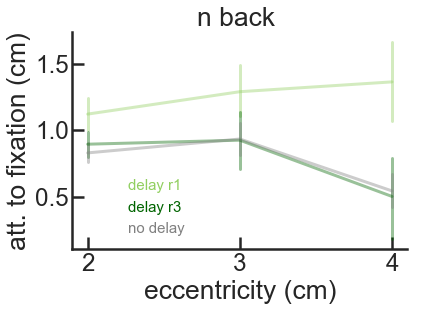

In [286]:
##triple interaction! the bias grows with more items in the internal eccentricities

sns.lineplot(x='number_rep', y='r_err',
             alpha=0.4, color=c_d3, data=df_prev.loc[(df_prev['rT_1']==7.72) & 
                                                               (df_prev['number_rep']<5) & (df_prev['delay_n']=='delay 3')],
             ci=69, err_style="bars", label='delay r1' )


sns.lineplot(x='number_rep', y='r_err',
             alpha=0.4, color='darkgreen', data=df_prev.loc[(df_prev['rT_1']==13.68) & 
                                                               (df_prev['number_rep']<5) & (df_prev['delay_n']=='delay 3')],
             ci=69, err_style="bars", label='delay r3' )



sns.lineplot(x='number_rep', y='r_err',
             alpha=0.4, color='grey', data=df_prev.loc[(df_prev['number_rep']<5) & 
                                                                (df_prev['delay_n']=='delay 0')],
             ci=69, err_style="bars", label='no delay' )


plt.xlabel('eccentricity (cm)')
plt.ylabel('att. to fixation (cm)')
#plt.plot([7,14], [0,0], 'k--', linewidth=1);
plt.title('n back ')

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction

hue_order=[ 'delay r1', 'delay r3', 'no delay']
palette=[ c_d3, 'darkgreen', 'grey']

l = plt.legend(loc='best', frameon=False, prop={'size': 15})
for i_h, h_idx in enumerate(hue_order):
    l.get_texts()[i_h].set_text(h_idx)
    l.legendHandles[i_h].set_visible(False);
    l.get_texts()[i_h].set_color(palette[i_h]);
    
plt.show()


In [289]:
##at least 5% of the trials 
print(len(df_prev.loc[(df_prev['rT_1']==7.72)])*0.05)
print([len(df_prev.loc[(df_prev['rT_1']==7.72) & (df_prev['number_rep']==x)]) for x in range(2,9)])

print(len(df_prev.loc[(df_prev['rT_1']==13.68)])*0.05)
print([len(df_prev.loc[(df_prev['rT_1']==7.72) & (df_prev['number_rep']==x)]) for x in range(2,9)])

21.25
[266, 99, 37, 16, 5, 1, 1]
22.150000000000002
[266, 99, 37, 16, 5, 1, 1]


In [290]:
formula_= 'r_err~number_rep*delay*rT_1'
res_m = smf.mixedlm(formula=formula_, 
                    data= df_prev.loc[df_prev['number_rep']<5], 
                    groups=df_prev.loc[df_prev['number_rep']<5, 'subject']).fit()
print(res_m.summary())


             Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   r_err     
No. Observations:     827       Method:               REML      
No. Groups:           18        Scale:                0.9010    
Min. group size:      11        Likelihood:           -1178.2934
Max. group size:      64        Converged:            Yes       
Mean group size:      45.9                                      
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept              1.298    0.688  1.887 0.059 -0.050  2.647
number_rep            -0.279    0.261 -1.070 0.285 -0.790  0.232
delay                 -0.409    0.322 -1.269 0.204 -1.040  0.222
number_rep:delay       0.264    0.128  2.058 0.040  0.013  0.515
rT_1                  -0.042    0.061 -0.691 0.490 -0.161  0.077
number_rep:rT_1        0.026    0.024  

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


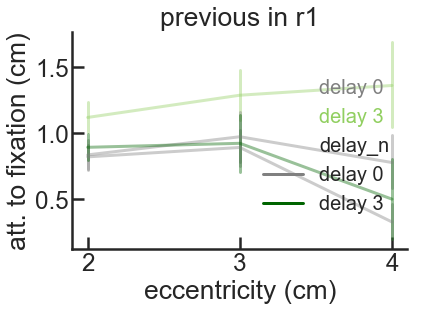

             Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   r_err     
No. Observations:     827       Method:               REML      
No. Groups:           18        Scale:                0.9010    
Min. group size:      11        Likelihood:           -1178.2934
Max. group size:      64        Converged:            Yes       
Mean group size:      45.9                                      
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept              1.298    0.688  1.887 0.059 -0.050  2.647
number_rep            -0.279    0.261 -1.070 0.285 -0.790  0.232
delay                 -0.409    0.322 -1.269 0.204 -1.040  0.222
number_rep:delay       0.264    0.128  2.058 0.040  0.013  0.515
rT_1                  -0.042    0.061 -0.691 0.490 -0.161  0.077
number_rep:rT_1        0.026    0.024  

In [278]:
sns.lineplot(x='number_rep', y='r_err', hue='delay_n', hue_order=['delay 0', 'delay 3'],
             alpha=0.4, palette=[c_d0, c_d3], data=df_prev.loc[(df_prev['rT_1']==7.72) & (df_prev['number_rep']<5)],
             ci=69, err_style="bars" )


sns.lineplot(x='number_rep', y='r_err', hue='delay_n', hue_order=['delay 0', 'delay 3'],
             alpha=0.4, palette=['grey', 'darkgreen'], data=df_prev.loc[(df_prev['rT_1']==13.68)  & (df_prev['number_rep']<5)],
             ci=69, err_style="bars" )

#plt.ylim(0.5, 1.1)
#plt.yticks([0.5, 0.8,1.1])
#plt.xlim(7, 14)
plt.xlabel('eccentricity (cm)')
plt.ylabel('att. to fixation (cm)')
#plt.plot([7,14], [0,0], 'k--', linewidth=1);
plt.title('previous in r1')

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction

hue_order=['', 'delay 0', 'delay 3']
palette=['k', c_d0, c_d3]

l = plt.legend(loc='best', frameon=False, prop={'size': 20})
for i_h, h_idx in enumerate(hue_order):
    l.get_texts()[i_h].set_text(h_idx)
    l.legendHandles[i_h].set_visible(False);
    l.get_texts()[i_h].set_color(palette[i_h]);
    
plt.show()


##############################################
##############################################




21.25
[266, 99, 37, 16, 5, 1, 1]


22.150000000000002
[266, 99, 37, 16, 5, 1, 1]


In [263]:
[len(df_prev.loc[(df_prev['rT_1']==13.68) & (df_prev['number_rep']==x)]) for x in range(2,9)]
[len(df_prev.loc[(df_prev['rT_1']==7.72) & (df_prev['number_rep']==x)]) for x in range(2,9)]

[266, 99, 37, 16, 5, 1, 1]

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


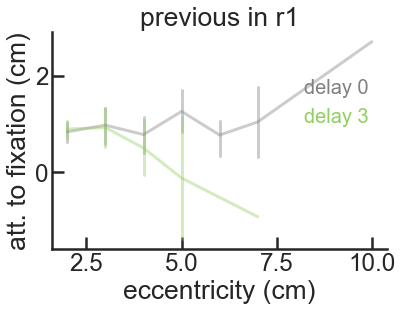

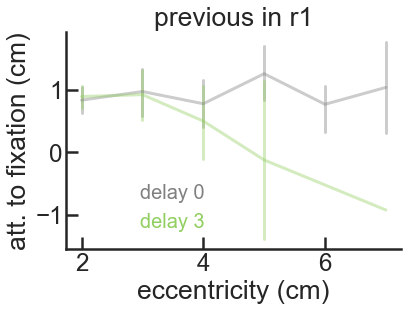

           Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  r_err    
No. Observations:   442      Method:              REML     
No. Groups:         18       Scale:               1.0039   
Min. group size:    5        Likelihood:          -657.1110
Max. group size:    38       Converged:           Yes      
Mean group size:    24.6                                   
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept         0.922    0.268  3.443 0.001  0.397  1.447
number_rep       -0.001    0.070 -0.014 0.989 -0.138  0.136
delay             0.130    0.101  1.285 0.199 -0.068  0.328
number_rep:delay -0.053    0.038 -1.415 0.157 -0.127  0.020
Group Var         0.546    0.205                           



In [258]:
sns.lineplot(x='number_rep', y='r_err', hue='delay_n', hue_order=['delay 0', 'delay 3'],
             alpha=0.4, palette=[c_d0, c_d3], data=df_prev.loc[(df_prev['rT_1']==13.68)],
             ci=95, err_style="bars" )
#plt.ylim(0.5, 1.1)
#plt.yticks([0.5, 0.8,1.1])
#plt.xlim(7, 14)
plt.xlabel('eccentricity (cm)')
plt.ylabel('att. to fixation (cm)')
#plt.plot([7,14], [0,0], 'k--', linewidth=1);
plt.title('previous in r1')

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction

hue_order=['', 'delay 0', 'delay 3']
palette=['k', c_d0, c_d3]

l = plt.legend(loc='best', frameon=False, prop={'size': 20})
for i_h, h_idx in enumerate(hue_order):
    l.get_texts()[i_h].set_text(h_idx)
    l.legendHandles[i_h].set_visible(False);
    l.get_texts()[i_h].set_color(palette[i_h]);
    
plt.show()


##############################################
##############################################

sns.lineplot(x='number_rep', y='r_err', hue='delay_n', hue_order=['delay 0', 'delay 3'],
             alpha=0.4, palette=[c_d0, c_d3], data=df_prev.loc[(df_prev['rT_1']==13.68) & (df_prev['number_rep']<9)],
             ci=95, err_style="bars" )
#plt.ylim(0.5, 1.1)
#plt.yticks([0.5, 0.8,1.1])
#plt.xlim(7, 14)
plt.xlabel('eccentricity (cm)')
plt.ylabel('att. to fixation (cm)')
#plt.plot([7,14], [0,0], 'k--', linewidth=1);
plt.title('previous in r1')

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction

hue_order=['', 'delay 0', 'delay 3']
palette=['k', c_d0, c_d3]

l = plt.legend(loc='best', frameon=False, prop={'size': 20})
for i_h, h_idx in enumerate(hue_order):
    l.get_texts()[i_h].set_text(h_idx)
    l.legendHandles[i_h].set_visible(False);
    l.get_texts()[i_h].set_color(palette[i_h]);
    
plt.show()




formula_= 'r_err~number_rep*delay'
res_m = smf.mixedlm(formula=formula_, 
                    data= df_prev.loc[(df_prev['rT_1']==13.68) & (df_prev['number_rep']<9)], 
                    groups=df_prev.loc[(df_prev['rT_1']==13.68)  & (df_prev['number_rep']<9), 'subject']).fit()
print(res_m.summary())


In [234]:
formula_= 'r_err~number_rep*delay'
res_m = smf.mixedlm(formula=formula_, 
                    data= df_prev.loc[(df_prev['rT_1']==7.72) & (df_prev['number_rep']<6)], 
                    groups=df_prev.loc[(df_prev['rT_1']==7.72)  & (df_prev['number_rep']<6), 'subject']).fit()
print(res_m.summary())


           Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: r_err      
No. Observations:   8412    Method:             REML       
No. Groups:         18      Scale:              1.0665     
Min. group size:    72      Likelihood:         -12265.6387
Max. group size:    660     Converged:          Yes        
Mean group size:    467.3                                  
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept         0.784    0.184  4.271 0.000  0.424  1.144
number_rep       -0.003    0.018 -0.178 0.859 -0.039  0.033
delay            -0.046    0.026 -1.806 0.071 -0.096  0.004
number_rep:delay  0.043    0.010  4.410 0.000  0.024  0.062
Group Var         0.560    0.187                           



In [231]:
len(df_prev)*0.01

177.84

In [143]:
df_inter.loc[(df_inter[trials_back]==7.72) | (df_inter[trials_back]==13.68), trials_back].unique()

array([13.68,  7.72])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


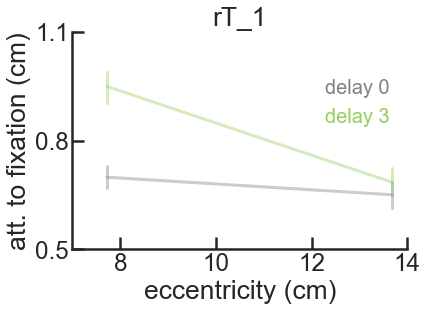

In [158]:

sns.lineplot(x=trials_back, y='r_err', hue='delay_n', hue_order=['delay 0', 'delay 3'],
             alpha=0.4, palette=[c_d0, c_d3], data=df_inter.loc[(df_inter[trials_back]==7.72) | (df_inter[trials_back]==13.68)],
             ci=95, err_style="bars" )
plt.ylim(0.5, 1.1)
plt.yticks([0.5, 0.8,1.1])
plt.xlim(7, 14)
plt.xlabel('eccentricity (cm)')
plt.ylabel('att. to fixation (cm)')
plt.plot([7,14], [0,0], 'k--', linewidth=1);
plt.title(trials_back)

plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction

hue_order=['', 'delay 0', 'delay 3']
palette=['k', c_d0, c_d3]

l = plt.legend(loc='best', frameon=False, prop={'size': 20})
for i_h, h_idx in enumerate(hue_order):
    l.get_texts()[i_h].set_text(h_idx)
    l.legendHandles[i_h].set_visible(False);
    l.get_texts()[i_h].set_color(palette[i_h]);
    
plt.show()

In [134]:
sns.lineplot


<function seaborn.relational.lineplot(x=None, y=None, hue=None, size=None, style=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, units=None, estimator='mean', ci=95, n_boot=1000, sort=True, err_style='band', err_kws=None, legend='brief', ax=None, **kwargs)>

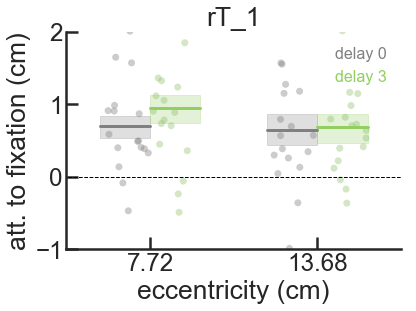

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r_err      
No. Observations: 17976   Method:             REML       
No. Groups:       18      Scale:              1.1417     
Min. group size:  300     Likelihood:         -26766.3679
Max. group size:  1344    Converged:          Yes        
Mean group size:  998.7                                  
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       0.709    0.177  4.011 0.000  0.363  1.056
rT_1           -0.002    0.004 -0.467 0.641 -0.009  0.005
delay           0.136    0.019  7.226 0.000  0.099  0.173
rT_1:delay     -0.009    0.002 -5.267 0.000 -0.012 -0.006
Group Var       0.535    0.173                           



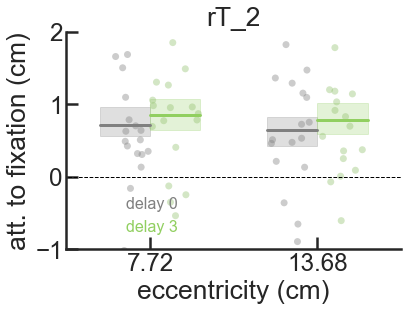

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r_err      
No. Observations: 18108   Method:             REML       
No. Groups:       18      Scale:              1.1203     
Min. group size:  372     Likelihood:         -26792.3216
Max. group size:  1392    Converged:          Yes        
Mean group size:  1006.0                                 
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       0.637    0.183  3.481 0.001  0.278  0.996
rT_2            0.003    0.003  0.777 0.437 -0.004  0.009
delay           0.109    0.018  6.172 0.000  0.074  0.144
rT_2:delay     -0.005    0.002 -3.059 0.002 -0.008 -0.002
Group Var       0.579    0.188                           



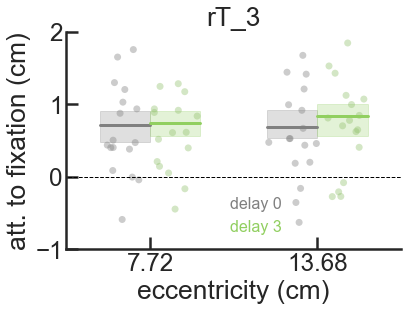

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r_err      
No. Observations: 18108   Method:             REML       
No. Groups:       18      Scale:              1.1401     
Min. group size:  336     Likelihood:         -26949.5510
Max. group size:  1380    Converged:          Yes        
Mean group size:  1006.0                                 
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       0.602    0.175  3.433 0.001  0.258  0.946
rT_3            0.007    0.003  2.157 0.031  0.001  0.014
delay           0.051    0.017  2.942 0.003  0.017  0.086
rT_3:delay     -0.000    0.002 -0.302 0.762 -0.004  0.003
Group Var       0.530    0.171                           



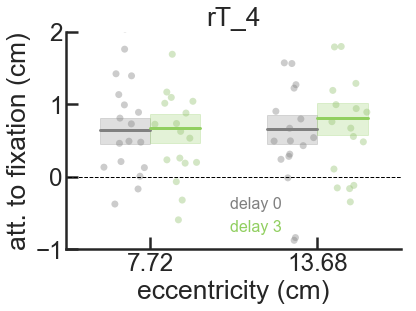

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r_err      
No. Observations: 18264   Method:             REML       
No. Groups:       18      Scale:              1.1480     
Min. group size:  348     Likelihood:         -27244.5197
Max. group size:  1368    Converged:          Yes        
Mean group size:  1014.7                                 
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       0.706    0.176  4.023 0.000  0.362  1.050
rT_4           -0.005    0.003 -1.502 0.133 -0.011  0.001
delay          -0.051    0.017 -3.024 0.002 -0.083 -0.018
rT_4:delay      0.008    0.002  5.509 0.000  0.005  0.011
Group Var       0.533    0.172                           



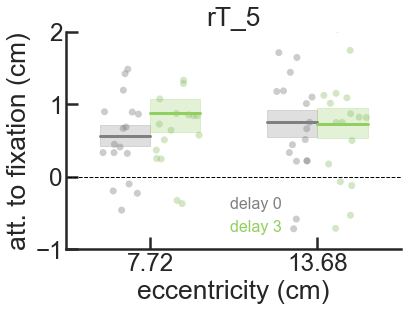

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r_err      
No. Observations: 18024   Method:             REML       
No. Groups:       18      Scale:              1.1367     
Min. group size:  384     Likelihood:         -26798.7168
Max. group size:  1380    Converged:          Yes        
Mean group size:  1001.3                                 
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       0.509    0.176  2.893 0.004  0.164  0.854
rT_5            0.017    0.003  5.414 0.000  0.011  0.023
delay           0.122    0.016  7.523 0.000  0.090  0.153
rT_5:delay     -0.007    0.001 -4.849 0.000 -0.010 -0.004
Group Var       0.537    0.174                           



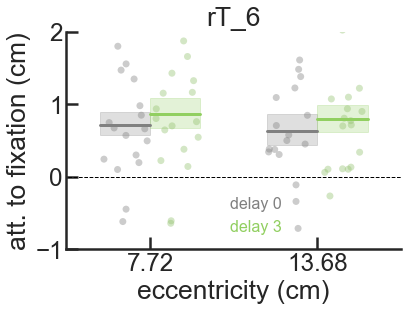

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r_err      
No. Observations: 18276   Method:             REML       
No. Groups:       18      Scale:              1.1144     
Min. group size:  372     Likelihood:         -26991.5964
Max. group size:  1380    Converged:          Yes        
Mean group size:  1015.3                                 
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       0.715    0.179  4.003 0.000  0.365  1.064
rT_6           -0.002    0.003 -0.568 0.570 -0.007  0.004
delay           0.034    0.016  2.214 0.027  0.004  0.065
rT_6:delay      0.001    0.001  0.713 0.476 -0.002  0.004
Group Var       0.556    0.181                           



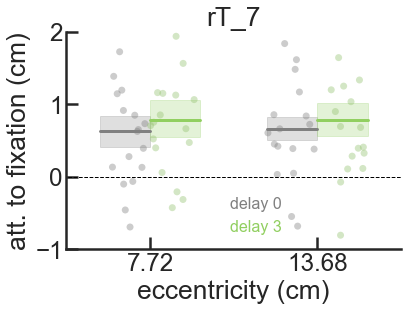

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r_err      
No. Observations: 18300   Method:             REML       
No. Groups:       18      Scale:              1.1142     
Min. group size:  396     Likelihood:         -27026.2799
Max. group size:  1380    Converged:          Yes        
Mean group size:  1016.7                                 
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       0.493    0.182  2.711 0.007  0.137  0.850
rT_7            0.015    0.003  5.135 0.000  0.009  0.020
delay           0.110    0.015  7.224 0.000  0.080  0.140
rT_7:delay     -0.005    0.001 -3.836 0.000 -0.008 -0.003
Group Var       0.579    0.189                           



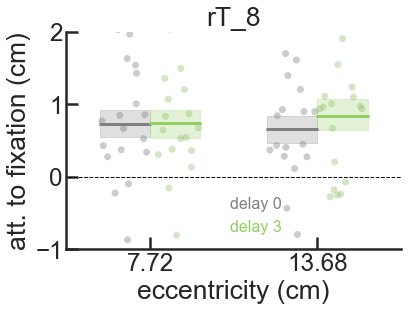

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r_err      
No. Observations: 18180   Method:             REML       
No. Groups:       18      Scale:              1.1027     
Min. group size:  372     Likelihood:         -26755.1161
Max. group size:  1416    Converged:          Yes        
Mean group size:  1010.0                                 
----------------------------------------------------------
             Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept    0.662     0.181  3.651  0.000   0.306   1.017
rT_8         0.004     0.003  1.532  0.126  -0.001   0.010
delay        0.032     0.015  2.190  0.029   0.003   0.061
rT_8:delay   0.000     0.001  0.071  0.944  -0.003   0.003
Group Var    0.575     0.188                              



In [131]:


for trials_back in [ 'rT_1',  'rT_2',  'rT_3',  'rT_4',  'rT_5',  'rT_6',  'rT_7',  'rT_8'  ]:
    linares_plot(x=trials_back, y='r_err', hue='delay_n', order=[7.72, 13.68], hue_order=['delay 0', 'delay 3'],
                 alpha=0.4, palette=[c_d0, c_d3], df=df_inter, point_size=7,   CI=0.68,
                 by_subj=True, subj_col='subject',
                 plot_box=True, fill_box=True, reps=100, alpha_box=0.25, sep_axis=False)
    plt.ylim(-1,2)
    plt.xlim(-0.5, 1.5)
    plt.xlabel('eccentricity (cm)')
    plt.ylabel('att. to fixation (cm)')
    plt.plot([-1,2], [0,0], 'k--', linewidth=1);
    plt.title(trials_back)
    plt.show()
    formula_= 'r_err~' + trials_back +'*delay'
    res_m = smf.mixedlm(formula=formula_, 
                        data=df_inter.loc[df_inter[trials_back]!=10.7], 
                        groups=df_inter.loc[df_inter[trials_back]!=10.7, 'subject']).fit()
    print(res_m.summary())

In [62]:
res_m = smf.mixedlm(formula='r_err ~ r_T + rT_1 + rT_2 + rT_3 + rT_4 + + rT_5 + rT_6 + rT_7 + rT_8 + rT_9 + rT_10 + rT_11+ rT_12', 
                    data=serial_b, groups=serial_b['subject']).fit()
print(res_m.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r_err       
No. Observations: 98232   Method:             REML        
No. Groups:       18      Scale:              1.1475      
Min. group size:  2004    Likelihood:         -146280.7090
Max. group size:  7476    Converged:          Yes         
Mean group size:  5457.3                                  
-----------------------------------------------------------
           Coef.   Std.Err.     z     P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept  -0.342     0.166   -2.063  0.039  -0.667  -0.017
r_T         0.113     0.001   86.210  0.000   0.111   0.116
rT_1       -0.023     0.001  -18.395  0.000  -0.026  -0.021
rT_2       -0.004     0.001   -2.898  0.004  -0.006  -0.001
rT_3        0.007     0.001    6.025  0.000   0.005   0.010
rT_4        0.005     0.001    4.291  0.000   0.003   0.008
rT_5        0.003     0.001    2.519  0.012   0.001   0.00

In [83]:
res_m = smf.mixedlm(formula='r_err ~ rT_7', 
                    data=serial_b, groups=serial_b['subject']).fit()
print(res_m.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r_err       
No. Observations: 98232   Method:             REML        
No. Groups:       18      Scale:              1.2400      
Min. group size:  2004    Likelihood:         -150024.4951
Max. group size:  7476    Converged:          Yes         
Mean group size:  5457.3                                  
-----------------------------------------------------------
              Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept     0.762     0.164  4.662  0.000   0.442   1.083
rT_7          0.000     0.001  0.063  0.950  -0.002   0.002
Group Var     0.479     0.150                              



In [106]:
serial_b7 = serial_b.loc[serial_b['rT_1']!=0]
res_m = smf.mixedlm(formula='r_err ~ rT_1', 
                    data=serial_b7, groups=serial_b7['subject']).fit()
print(res_m.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r_err       
No. Observations: 97632   Method:             REML        
No. Groups:       18      Scale:              1.2344      
Min. group size:  1992    Likelihood:         -148886.1017
Max. group size:  7428    Converged:          Yes         
Mean group size:  5424.0                                  
-----------------------------------------------------------
           Coef.   Std.Err.     z     P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept   1.060     0.164    6.471  0.000   0.739   1.381
rT_1       -0.028     0.001  -20.294  0.000  -0.030  -0.025
Group Var   0.479     0.150                                



In [99]:
res_m = smf.mixedlm(formula='r_err ~ r_T + rT_1 + rT_2 + rT_3 + rT_4 + + rT_5 + rT_6', 
                    data=serial_b, groups=serial_b['subject']).fit()
print(res_m.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r_err       
No. Observations: 98232   Method:             REML        
No. Groups:       18      Scale:              1.1476      
Min. group size:  2004    Likelihood:         -146253.6064
Max. group size:  7476    Converged:          Yes         
Mean group size:  5457.3                                  
-----------------------------------------------------------
           Coef.   Std.Err.     z     P>|z|  [0.025  0.975]
-----------------------------------------------------------
Intercept  -0.347     0.166   -2.091  0.037  -0.671  -0.022
r_T         0.113     0.001   86.215  0.000   0.111   0.116
rT_1       -0.023     0.001  -18.410  0.000  -0.026  -0.021
rT_2       -0.004     0.001   -2.994  0.003  -0.006  -0.001
rT_3        0.007     0.001    5.924  0.000   0.005   0.010
rT_4        0.005     0.001    4.177  0.000   0.003   0.007
rT_5        0.003     0.001    2.297  0.022   0.000   0.00

In [113]:
res_m = smf.mixedlm(formula='r_err ~ r_T ', 
                    data=serial_b.loc[serial_b['delay']==0], groups=serial_b.loc[serial_b['delay']==0, 'subject']).fit()
print(res_m.summary())
res_m = smf.mixedlm(formula='r_err ~ r_T ', 
                    data=serial_b.loc[serial_b['delay']==3], groups=serial_b.loc[serial_b['delay']==3, 'subject']).fit()
print(res_m.summary())
res_m = smf.mixedlm(formula='r_err ~ r_T*delay ', 
                    data=serial_b, groups=serial_b['subject']).fit()
print(res_m.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r_err      
No. Observations: 49212   Method:             REML       
No. Groups:       18      Scale:              0.9374     
Min. group size:  1008    Likelihood:         -68305.8731
Max. group size:  3744    Converged:          Yes        
Mean group size:  2734.0                                 
----------------------------------------------------------
           Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
----------------------------------------------------------
Intercept  -0.296     0.154  -1.927  0.054  -0.597   0.005
r_T         0.095     0.002  56.460  0.000   0.091   0.098
Group Var   0.418     0.147                               

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r_err      
No. Observations: 49020   Method:             REML       
No. Groups:       18      Scale:              1.3338     
Min. group size:  996     L

In [23]:
df_sess

,Unnamed: 0,r_T,r_NT,delay,type,A_T,A_NT,A_err,r_err,A_R,r_R,RT,subject,session,Int_A_err,Int_r_err,rT_-1,rT_-2,rT_-3
8018,8018,10.70,NaN,0.0,0.0,221.0,NaN,-4.00,1.88,225.00,8.82,0.00,18,3,NaN,NaN,None,None,None
8019,8019,7.72,13.68,3.0,3.0,133.0,133.0,-7.78,0.73,140.78,6.99,0.00,18,3,NaN,-0.73,10.7,None,None
8020,8020,7.72,13.68,0.0,3.0,301.0,301.0,-2.36,0.74,303.36,6.98,0.00,18,3,NaN,-0.74,7.72,10.7,None
8021,8021,13.68,NaN,0.0,0.0,123.0,NaN,-6.91,1.53,129.91,12.15,0.00,18,3,NaN,NaN,7.72,7.72,10.7
8022,8022,10.70,NaN,0.0,0.0,58.0,NaN,2.63,2.30,55.37,8.40,0.00,18,3,NaN,NaN,13.68,7.72,7.72
8023,8023,7.72,NaN,3.0,0.0,214.0,NaN,-7.40,1.79,221.40,5.93,0.00,18,3,NaN,NaN,10.7,13.68,7.72
8024,8024,13.68,NaN,3.0,0.0,212.0,NaN,-2.73,2.06,214.73,11.62,0.00,18,3,NaN,NaN,7.72,10.7,13.68
8025,8025,7.72,7.72,0.0,1.0,53.0,33.0,-7.46,1.66,60.46,6.06,0.00,18,3,-7.46,NaN,13.68,7.72,10.7
8026,8026,7.72,NaN,0.0,0.0,323.0,NaN,-0.29,1.25,323.29,6.47,0.00,18,3,NaN,NaN,7.72,13.68,7.72
8027,8027,7.72,7.72,3.0,1.0,123.0,107.0,-21.89,1.81,144.89,5.91,0.00,18,3,-21.89,NaN,7.72,7.72,13.68


In [18]:
back1_r = list(df_sess['r_T'][:-1].values)
back1_r.insert(0,'None')

back2_r = list(df_sess['r_T'][:-2].values)
[back2_r.insert(0,'None') for i in range(2)]

back3_r = list(df_sess['r_T'][:-3].values)
[back3_r.insert(0,'None') for i in range(3)]



['None',
 'None',
 'None',
 10.7,
 7.72,
 7.72,
 13.68,
 10.7,
 7.72,
 13.68,
 7.72,
 7.72,
 7.72,
 10.7,
 7.72,
 13.68,
 7.72,
 13.68,
 7.72,
 7.72,
 10.7,
 7.72,
 7.72,
 7.72,
 10.7,
 10.7,
 7.72,
 7.72,
 7.72,
 13.68,
 10.7,
 13.68,
 13.68,
 7.72,
 13.68,
 13.68,
 7.72,
 10.7,
 7.72,
 7.72,
 7.72,
 7.72,
 10.7,
 7.72,
 10.7,
 13.68,
 10.7,
 13.68,
 13.68,
 13.68,
 13.68,
 13.68,
 10.7,
 10.7,
 13.68,
 10.7,
 7.72,
 13.68,
 13.68,
 13.68,
 13.68,
 7.72,
 13.68,
 7.72,
 10.7,
 7.72,
 10.7,
 13.68,
 13.68,
 10.7,
 10.7,
 13.68,
 7.72,
 13.68,
 7.72,
 10.7,
 7.72,
 7.72,
 13.68,
 13.68,
 13.68,
 13.68,
 13.68,
 13.68,
 10.7,
 13.68,
 7.72,
 13.68,
 13.68,
 7.72,
 13.68,
 10.7,
 7.72,
 13.68,
 13.68,
 13.68,
 7.72,
 10.7,
 7.72,
 13.68,
 13.68,
 7.72,
 13.68,
 10.7,
 13.68,
 10.7,
 10.7,
 7.72,
 13.68,
 10.7,
 7.72,
 7.72,
 10.7,
 10.7,
 7.72,
 13.68,
 13.68,
 13.68,
 7.72,
 13.68,
 10.7,
 13.68,
 7.72,
 13.68,
 7.72,
 10.7,
 7.72,
 10.7,
 7.72,
 10.7,
 10.7,
 7.72,
 7.72,
 10.7,
 13.68,

In [4]:
data.subject.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18], dtype=int64)

In [12]:
res_m = smf.mixedlm(formula='r_T ~ r_err', data=df_controls, groups=df_controls['subject']).fit()
print(res_m.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r_T       
No. Observations: 3396    Method:             REML      
No. Groups:       18      Scale:              5.5498    
Min. group size:  72      Likelihood:         -7747.1994
Max. group size:  239     Converged:          Yes       
Mean group size:  188.7                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     10.196    0.106 96.252 0.000  9.989 10.404
r_err          0.577    0.041 13.910 0.000  0.496  0.659
Group Var      0.146    0.027                           



In [15]:
res_m = smf.mixedlm(formula='r_T ~ r_err*delay', data=df_controls, groups=df_controls['subject']).fit()
print(res_m.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: r_T       
No. Observations: 3396    Method:             REML      
No. Groups:       18      Scale:              5.5487    
Min. group size:  72      Likelihood:         -7751.7097
Max. group size:  239     Converged:          Yes       
Mean group size:  188.7                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept     10.223    0.118 86.295 0.000  9.991 10.455
r_err          0.610    0.059 10.289 0.000  0.494  0.726
delay         -0.023    0.033 -0.685 0.493 -0.088  0.042
r_err:delay   -0.015    0.022 -0.650 0.516 -0.058  0.029
Group Var      0.152    0.028                           



In [40]:
sample= {'Maths': [90, 80, 70, 60, 50, 40, 30, 20], 'English': [77, 66, 55, 44, 33, 66, 44, 11],
        'Work': [76, 75, 72, 66, 66, 63, 62, 61] ,'Brains': [33, 66, 22, 44, 11, 66, 55, 11]}

DD = pd.DataFrame(sample,columns= ['Maths', 'English', 'Work', 'Brains'])
DD

,Maths,English,Work,Brains
0,90,77,76,33
1,80,66,75,66
2,70,55,72,22
3,60,44,66,44
4,50,33,66,11
5,40,66,63,66
6,30,44,62,55
7,20,11,61,11


In [59]:
res = smf.ols(formula='Maths + English ~  Work + Brains', data=DD).fit()
#print(res.summary())
res.

In [42]:
import statsmodels.multivariate.multivariate_ols as smmv 
res_m = smmv._MultivariateOLS.from_formula(formula='Maths + English ~  Work + Brains', data=DD).fit()
print(res_m.summary())

NotImplementedError: 

In [52]:
res_m.summary()

NotImplementedError: 

In [33]:
import statsmodels.api as sm
import pandas as pd
import statsmodels.multivariate.multivariate_ols as smmv 

sampleY = {'Maths': [90, 80, 70, 60, 50, 40, 30, 20], 'English': [77, 66, 55, 44, 33, 66, 44, 11]}
sampleX = {'Work': [76, 75, 72, 66, 66, 63, 62, 61] ,'Brains': [33, 66, 22, 44, 11, 66, 55, 11]}

Y = pd.DataFrame(sampleY,columns= ['Maths', 'English'])
#Y = pd.DataFrame(sampleY,columns= ['Maths'])

X = pd.DataFrame(sampleX,columns= ['Work', 'Brains'])

Xc = sm.add_constant(X)

linear_regression = smmv._MultivariateOLS(Y,Xc)
#linear_regression = sm.OLS(Y,Xc) #- this one works, but of course only with a single DV, i.e. Y = pd.DataFrame(sampleY,columns= ['Maths'])
fitted_model = linear_regression.fit()
fitted_model.summary()

NotImplementedError: 

In [35]:
A = smmv._MultivariateOLS(Y,Xc)

In [37]:
B = A.fit()

In [39]:
B.summary()

NotImplementedError: 